In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
from PyCEC.cv.collective_variable import mCECCollectiveVariable
from PyCEC.cec_system import CECSystem
from PyCEC.analysis.analysis import WaterAnalysis, CVAnalysis
from PyCEC.analysis.residue_analysis import ResidueAnalysis
from PyCEC.analysis.plotting import CVPlotting
import MDAnalysis as mda

In [2]:
# Directory and title
dir1 = '/biggin/b222/catz0163/pept/dynamics/pept_holo/pept_AF_H87P_D342P_v2/qmmm'
dir1 = '/Users/nfo24278/Documents/dphil/proton_transfer/PyCEC/simulations/pept_AF_H87P_D342P'
title1 = 'PepT2 with AF H87P D342P'

# Load the universe
u1 = mda.Universe(f'{dir1}/prod-s200.pdb', f'{dir1}/prod-s200.xtc')

In [5]:
frame_test = 88

# Initialise class
cv = CECSystem(u1, initial_resid=87, target_resid=56,
                            other_resids=[53, 57, 61, 622, 324, 345, 161, 60, 342],
                            ligand=[1, 2], cyzone_dim=[9, 8, -8],
                            frame_n=frame_test)

#cv.cv_selection_string
cv.get_sele_info()
cv.write_cv_and_qm(frame_n=frame_test)


--- RESIDS ---

Number of atoms: 78
Number of residues: 13
Residue names: ARG, GLN, GLU, LYS, PHE, HIP, ALA, ASH, TYR, THR
Atom names: CG, C, N, CB, OD1, NH1, ND1, NE, CE2, CE, OC2, CD1, OD2, CG2, OG1, CD2, NZ, CD, O, OE1, NE2, OE2, CA, OC1, CE1, OH, NH2, CZ

--- QM ATOMS ---

Number of QM atoms: 95
Number of QM residues: 31
Residue names: SOL, GLU, HIP
Atom names: HE2, NE2, HE1, HW1, OE2, HD2, HD1, OW, ND1, HW2, OE1

--- WATERS ---

Number of water atoms: 87
Number of water residues: 29
Residue names: SOL
Atom names: HW1, OW, HW2


function write_pdb (cv-selection, structures, <array>, 88, True, CV-atoms) took 0.02s to run.
function write_pdb (qm-selection, structures, <array>, 88, True, QM-atoms) took 0.00s to run.
function write_pdb (protein, structures, <array>, 88, True, Protein) took 0.08s to run.


/Users/nfo24278/miniconda3/envs/chem/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1153: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/nfo24278/miniconda3/envs/chem/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1200: UserWarning: Found missing chainIDs. Corresponding atoms will use value of 'X'
  warnings.warn("Found missing chainIDs."


101
[102  88  88  58  78  62  78  74  92  52  88 154  88  70 144 112 150 110
 108  62 118 114 100 100 136 126 104 136 114 126 120 112  90 126 128 200
  96  98 118 124 162 104 132 172 130  56 108 132 146 108 122  76 170 160
 168 146 114 158 106 108 124  84  86 116 100 208 114 118 122 176 188 156
 172 110 174 220 284 144 186 136 152 178 140 136 202 240 162 222 152 180
 196 174 128  68 104  66  94 140 150 168 148]


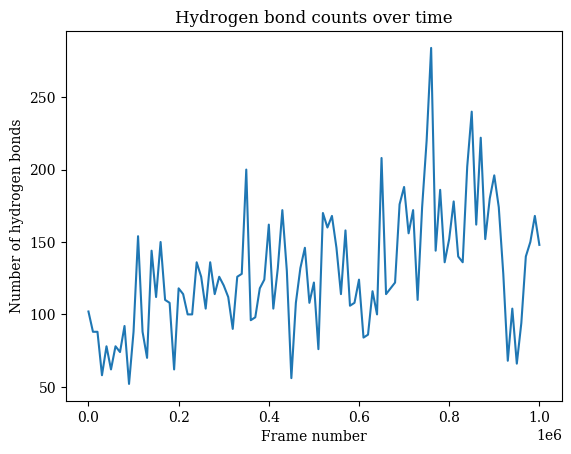

In [6]:
# Water analysis - Hydrogen bonds
wa = WaterAnalysis(u1, initial_resid=342, target_resid=56,
                    other_resids=[53, 57, 61, 622, 324, 345, 161, 60, 87],
                    ligand=[1, 2], cyzone_dim=[8, 8, -8],
                    frame_n=160)

counts = wa.get_water_h_bonds()
print(counts)

wa.plot_hbond_counts(counts, save=True)

101


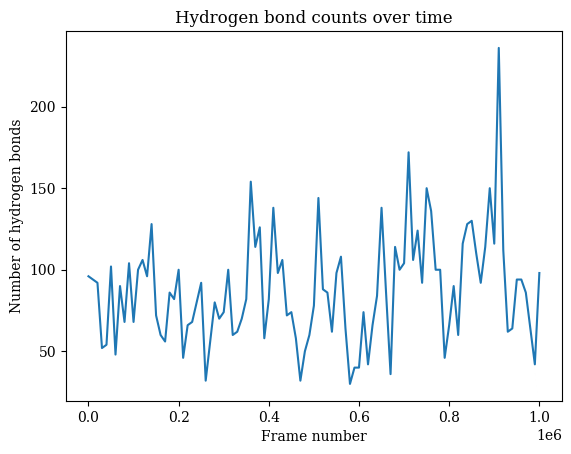

In [7]:
# Water analysis - Hydrogen bonds
wa = WaterAnalysis(u1, initial_resid=87, target_resid=56,
                    other_resids=[53, 57, 61, 622, 324, 345, 161, 60, 342],
                    ligand=[1, 2], cyzone_dim=[8, 8, -8],
                    frame_n=160)

counts = wa.get_water_h_bonds()

wa.plot_hbond_counts(counts, save=True)

In [5]:
wa.get_max_hbond_counts(counts)


Max counts: [236, 216, 186, 172, 166, 162, 154, 150, 150, 144]

Frames with the most hydrogen bonds: [182, 167, 171, 142, 127, 183, 72, 150, 150, 102]
Times of the frames with the most hydrogen bonds: [910000.0, 835000.0, 855000.0, 710000.0, 635000.0, 915000.0, 360000.0, 750000.0, 750000.0, 510000.0]


([182, 167, 171, 142, 127, 183, 72, 150, 150, 102],
 [910000.0,
  835000.0,
  855000.0,
  710000.0,
  635000.0,
  915000.0,
  360000.0,
  750000.0,
  750000.0,
  510000.0])